In [2]:
# Importing required libraries 

import sklearn, h5py
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,StratifiedKFold

import numpy as np
from numpy import savetxt
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
#from tensorflow import keras
#from tensorflow.python.keras import backend
#from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint
import os
from time import time
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

import keras
from keras import regularizers
from keras import backend
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint, TensorBoard

# Other  
import librosa
import librosa.display

from scipy.io import wavfile
from scipy import signal
from scipy.fft import fft, fftfreq
from scipy.fftpack import dct,idct

import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

import pickle
# ignore warnings 
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

Using TensorFlow backend.


In [11]:
global sampleRate,labels,mfcc,HOP,HOP_LENGTH
sampleRate = 22050*2
labels = {"anger":0, "disgust":1, "fear":2, "happiness":3, "sadness":4};
aesddPath ='/home/czerwone/Desktop/Datasets/AESDD';
fileList = getListOfFiles(aesddPath)
lengthVals = getDatasetStats(aesddPath);

357
241


In [26]:
#lengthVals = getDatasetStats(aesddPath);
#X = extractMFCCFeature(aesddPath,lengthVals[2],nMfcc=mfcc);
X = getFeatures(fileList,56,25,True)
X_Norm = dataNormalization(X);
Y = np.array(classifyData(aesddPath));

In [27]:
cnnInst = cnn(Y-1,X_Norm[...,np.newaxis],0.2,0.2,5,100);
cnnInst.split_train_test();
cnnInst.build_model();

built cnn model..
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 56, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 28, 13, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 28, 13, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 6, 32)         0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 6, 32)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 

In [28]:
startTime = time();
history = cnnInst.train();
time()-startTime

training model
Train on 362 samples, validate on 121 samples
Epoch 1/100
362/362 [==============================] - 1s 4ms/step - loss: 1.9878 - accuracy: 0.1989 - val_loss: 1.7982 - val_accuracy: 0.1570

Epoch 00001: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Vryzas_Saved_Models/keras_cnn_trained_model.h5
Epoch 2/100
362/362 [==============================] - 0s 1ms/step - loss: 1.7988 - accuracy: 0.2293 - val_loss: 1.8159 - val_accuracy: 0.1570

Epoch 00002: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Vryzas_Saved_Models/keras_cnn_trained_model.h5
Epoch 3/100
362/362 [==============================] - 0s 1ms/step - loss: 1.8038 - accuracy: 0.2348 - val_loss: 1.8427 - val_accuracy: 0.1570

Epoch 00003: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Vryzas_Saved_Models/keras_cnn_trained_model.h5
Epoch 4/100
362/362 [==============================] - 0s 819us/step - loss: 1.8116 - accuracy: 0.2348 - 


Epoch 00059: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Vryzas_Saved_Models/keras_cnn_trained_model.h5
Epoch 60/100
362/362 [==============================] - 0s 1ms/step - loss: 0.9922 - accuracy: 0.6906 - val_loss: 1.4016 - val_accuracy: 0.6033

Epoch 00060: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Vryzas_Saved_Models/keras_cnn_trained_model.h5
Epoch 61/100
362/362 [==============================] - 0s 978us/step - loss: 1.1145 - accuracy: 0.6575 - val_loss: 1.3227 - val_accuracy: 0.6198

Epoch 00061: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Vryzas_Saved_Models/keras_cnn_trained_model.h5
Epoch 62/100
362/362 [==============================] - 0s 1ms/step - loss: 0.9605 - accuracy: 0.7238 - val_loss: 1.2835 - val_accuracy: 0.5950

Epoch 00062: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Vryzas_Saved_Models/keras_cnn_trained_model.h5
Epoch 63/100
362/362 [====

362/362 [==============================] - 0s 1ms/step - loss: 0.8321 - accuracy: 0.7873 - val_loss: 1.6258 - val_accuracy: 0.6116

Epoch 00089: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Vryzas_Saved_Models/keras_cnn_trained_model.h5
Epoch 90/100
362/362 [==============================] - 1s 2ms/step - loss: 0.8902 - accuracy: 0.7597 - val_loss: 1.5967 - val_accuracy: 0.6364

Epoch 00090: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Vryzas_Saved_Models/keras_cnn_trained_model.h5
Epoch 91/100
362/362 [==============================] - 0s 1ms/step - loss: 0.9306 - accuracy: 0.7459 - val_loss: 1.5720 - val_accuracy: 0.5950

Epoch 00091: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Vryzas_Saved_Models/keras_cnn_trained_model.h5
Epoch 92/100
362/362 [==============================] - 1s 2ms/step - loss: 0.9891 - accuracy: 0.7320 - val_loss: 1.3697 - val_accuracy: 0.6942

Epoch 00092: saving model to /h

56.04385447502136

121/121 [==============================] - 0s 929us/step
Test loss: 1.4120231797872496
Test accuracy: 0.6363636255264282
(121,) (121,)
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        27
           1       0.55      0.46      0.50        26
           2       0.52      0.48      0.50        25
           3       0.82      1.00      0.90        18
           4       0.67      0.72      0.69        25

    accuracy                           0.64       121
   macro avg       0.64      0.66      0.64       121
weighted avg       0.62      0.64      0.63       121

[[17  4  3  0  3]
 [ 4 12  4  4  2]
 [ 4  5 12  0  4]
 [ 0  0  0 18  0]
 [ 2  1  4  0 18]]


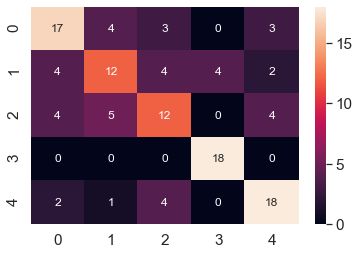

<Figure size 432x288 with 0 Axes>

In [29]:
cnnInst.evaluate();

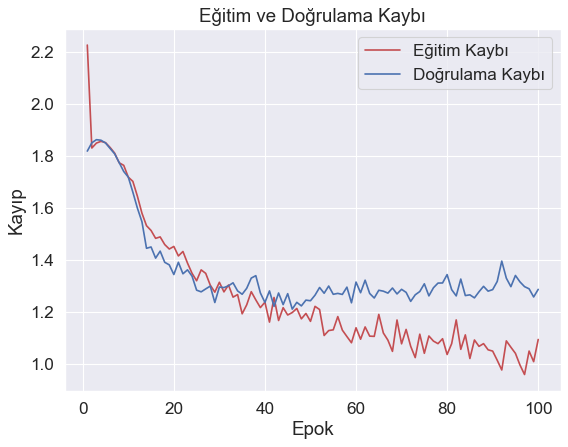

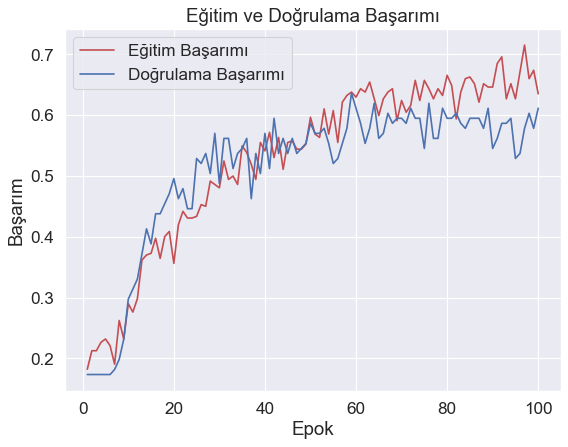

In [105]:
cnnInst.printHistory(history)

In [107]:
cnnFold = cnn(Y-1,X_Norm[...,np.newaxis],0.1,0.2,5,100,True);
cnnFold.split_train_test();
cnnFold.train_Kfold();

------------------------------------------------------------------------
Training for fold 1 ...
Train on 322 samples, validate on 161 samples
Epoch 1/100
322/322 [==============================] - 1s 4ms/step - loss: 2.3601 - accuracy: 0.1863 - val_loss: 1.8215 - val_accuracy: 0.1739
Epoch 2/100
322/322 [==============================] - 0s 1ms/step - loss: 1.8322 - accuracy: 0.2050 - val_loss: 1.8515 - val_accuracy: 0.1801
Epoch 3/100
322/322 [==============================] - 0s 1ms/step - loss: 1.8564 - accuracy: 0.2174 - val_loss: 1.8692 - val_accuracy: 0.1801
Epoch 4/100
322/322 [==============================] - 1s 2ms/step - loss: 1.8724 - accuracy: 0.1832 - val_loss: 1.8710 - val_accuracy: 0.2112
Epoch 5/100
322/322 [==============================] - 0s 1ms/step - loss: 1.8696 - accuracy: 0.2236 - val_loss: 1.8640 - val_accuracy: 0.2174
Epoch 6/100
322/322 [==============================] - 0s 1ms/step - loss: 1.8628 - accuracy: 0.2050 - val_loss: 1.8393 - val_accuracy: 0.2547

Epoch 57/100
322/322 [==============================] - 0s 1ms/step - loss: 1.0879 - accuracy: 0.6273 - val_loss: 1.3852 - val_accuracy: 0.4720
Epoch 58/100
322/322 [==============================] - 0s 1ms/step - loss: 1.0745 - accuracy: 0.6211 - val_loss: 1.4161 - val_accuracy: 0.4658
Epoch 59/100
322/322 [==============================] - 0s 1ms/step - loss: 1.0856 - accuracy: 0.5901 - val_loss: 1.3754 - val_accuracy: 0.4907
Epoch 60/100
322/322 [==============================] - 0s 1ms/step - loss: 1.1045 - accuracy: 0.5932 - val_loss: 1.4183 - val_accuracy: 0.4720
Epoch 61/100
322/322 [==============================] - 0s 1ms/step - loss: 1.2008 - accuracy: 0.5497 - val_loss: 1.4218 - val_accuracy: 0.4720
Epoch 62/100
322/322 [==============================] - 0s 1ms/step - loss: 1.1553 - accuracy: 0.5870 - val_loss: 1.4013 - val_accuracy: 0.4907
Epoch 63/100
322/322 [==============================] - 0s 1ms/step - loss: 1.1076 - accuracy: 0.5963 - val_loss: 1.4297 - val_accuracy:

Epoch 68/100
322/322 [==============================] - 0s 1ms/step - loss: 0.9714 - accuracy: 0.7453 - val_loss: 1.5411 - val_accuracy: 0.5839
Epoch 69/100
322/322 [==============================] - 0s 1ms/step - loss: 1.0994 - accuracy: 0.7112 - val_loss: 1.5684 - val_accuracy: 0.6335
Epoch 70/100
322/322 [==============================] - 0s 1ms/step - loss: 0.9622 - accuracy: 0.7453 - val_loss: 1.6125 - val_accuracy: 0.6211
Epoch 71/100
322/322 [==============================] - 1s 2ms/step - loss: 0.9676 - accuracy: 0.7547 - val_loss: 1.6551 - val_accuracy: 0.6025
Epoch 72/100
322/322 [==============================] - 1s 2ms/step - loss: 1.0837 - accuracy: 0.7298 - val_loss: 1.7071 - val_accuracy: 0.5652
Epoch 73/100
322/322 [==============================] - 1s 2ms/step - loss: 1.1396 - accuracy: 0.7174 - val_loss: 1.5375 - val_accuracy: 0.5839
Epoch 74/100
322/322 [==============================] - 1s 2ms/step - loss: 0.9770 - accuracy: 0.7857 - val_loss: 1.5711 - val_accuracy:

Epoch 79/100
322/322 [==============================] - 0s 1ms/step - loss: 1.0856 - accuracy: 0.6025 - val_loss: 1.2835 - val_accuracy: 0.6398
Epoch 80/100
322/322 [==============================] - 0s 892us/step - loss: 1.0437 - accuracy: 0.6801 - val_loss: 1.3941 - val_accuracy: 0.6211
Epoch 81/100
322/322 [==============================] - 0s 1ms/step - loss: 1.0363 - accuracy: 0.6863 - val_loss: 1.3483 - val_accuracy: 0.6273
Epoch 82/100
322/322 [==============================] - 0s 1ms/step - loss: 1.0332 - accuracy: 0.6708 - val_loss: 1.4041 - val_accuracy: 0.5963
Epoch 83/100
322/322 [==============================] - 0s 1ms/step - loss: 1.1252 - accuracy: 0.6398 - val_loss: 1.4470 - val_accuracy: 0.6087
Epoch 84/100
322/322 [==============================] - 0s 2ms/step - loss: 1.0718 - accuracy: 0.6615 - val_loss: 1.5324 - val_accuracy: 0.5280
Epoch 85/100
322/322 [==============================] - 0s 1ms/step - loss: 1.2316 - accuracy: 0.6211 - val_loss: 1.3221 - val_accurac

In [139]:
cnnIterFold = cnn(Y-1,X_Norm[...,np.newaxis],0.1,0.2,5,100,True);
cnnIterFold.train_Kfold_iter(5);

Start of the phase number : 1
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
302/302 [==============================] - 1s 3ms/step - loss: 1.9618 - accuracy: 0.2020
Epoch 2/100
302/302 [==============================] - 0s 1ms/step - loss: 1.8088 - accuracy: 0.1954
Epoch 3/100
302/302 [==============================] - 0s 1ms/step - loss: 1.8146 - accuracy: 0.2053
Epoch 4/100
302/302 [==============================] - 0s 1ms/step - loss: 1.8112 - accuracy: 0.2152
Epoch 5/100
302/302 [==============================] - 0s 1ms/step - loss: 1.7814 - accuracy: 0.2980
Epoch 6/100
302/302 [==============================] - 0s 1ms/step - loss: 1.7214 - accuracy: 0.3212
Epoch 7/100
302/302 [==============================] - 0s 1ms/step - loss: 1.6654 - accuracy: 0.3212
Epoch 8/100
302/302 [==============================] - 0s 1ms/step - loss: 1.6294 - accuracy: 0.3245
Epoch 9/100
302/302 [==============================] - 0s 1ms/ste

302/302 [==============================] - 0s 984us/step - loss: 1.2033 - accuracy: 0.6225
Epoch 59/100
302/302 [==============================] - 0s 801us/step - loss: 1.2522 - accuracy: 0.6126
Epoch 60/100
302/302 [==============================] - 0s 816us/step - loss: 1.1677 - accuracy: 0.6026
Epoch 61/100
302/302 [==============================] - 0s 1ms/step - loss: 1.2053 - accuracy: 0.6159
Epoch 62/100
302/302 [==============================] - 0s 956us/step - loss: 1.1417 - accuracy: 0.6391
Epoch 63/100
302/302 [==============================] - 0s 1ms/step - loss: 1.2138 - accuracy: 0.6093
Epoch 64/100
302/302 [==============================] - 0s 1ms/step - loss: 1.1672 - accuracy: 0.6159
Epoch 65/100
302/302 [==============================] - 0s 884us/step - loss: 1.1563 - accuracy: 0.6656
Epoch 66/100
302/302 [==============================] - 0s 1ms/step - loss: 1.1834 - accuracy: 0.6490
Epoch 67/100
302/302 [==============================] - 0s 1ms/step - loss: 1.1196 - 

302/302 [==============================] - 0s 1ms/step - loss: 1.4800 - accuracy: 0.3510
Epoch 14/100
302/302 [==============================] - 0s 1ms/step - loss: 1.4427 - accuracy: 0.3543
Epoch 15/100
302/302 [==============================] - 0s 979us/step - loss: 1.4339 - accuracy: 0.3675
Epoch 16/100
302/302 [==============================] - 0s 823us/step - loss: 1.4773 - accuracy: 0.3642
Epoch 17/100
302/302 [==============================] - 0s 1ms/step - loss: 1.4144 - accuracy: 0.4205
Epoch 18/100
302/302 [==============================] - 0s 1ms/step - loss: 1.3778 - accuracy: 0.4172
Epoch 19/100
302/302 [==============================] - 0s 1ms/step - loss: 1.3061 - accuracy: 0.5066
Epoch 20/100
302/302 [==============================] - 0s 1ms/step - loss: 1.3368 - accuracy: 0.4470
Epoch 21/100
302/302 [==============================] - 0s 1ms/step - loss: 1.3233 - accuracy: 0.4702
Epoch 22/100
302/302 [==============================] - 0s 1ms/step - loss: 1.3065 - accura

302/302 [==============================] - 0s 916us/step - loss: 1.0175 - accuracy: 0.6887
Epoch 71/100
302/302 [==============================] - 0s 1ms/step - loss: 1.0198 - accuracy: 0.7351
Epoch 72/100
302/302 [==============================] - 0s 1ms/step - loss: 1.0456 - accuracy: 0.6987
Epoch 73/100
302/302 [==============================] - 0s 2ms/step - loss: 0.9656 - accuracy: 0.7119
Epoch 74/100
302/302 [==============================] - 0s 1ms/step - loss: 1.0613 - accuracy: 0.6854
Epoch 75/100
302/302 [==============================] - 0s 1ms/step - loss: 1.0210 - accuracy: 0.6821
Epoch 76/100
302/302 [==============================] - 0s 1ms/step - loss: 1.0201 - accuracy: 0.6722
Epoch 77/100
302/302 [==============================] - 0s 1ms/step - loss: 1.0058 - accuracy: 0.7119
Epoch 78/100
302/302 [==============================] - 0s 1ms/step - loss: 0.9988 - accuracy: 0.7252
Epoch 79/100
302/302 [==============================] - 0s 1ms/step - loss: 1.0148 - accuracy

302/302 [==============================] - 0s 1ms/step - loss: 1.2692 - accuracy: 0.5397
Epoch 26/100
302/302 [==============================] - 0s 1ms/step - loss: 1.2088 - accuracy: 0.5828
Epoch 27/100
302/302 [==============================] - 0s 934us/step - loss: 1.1610 - accuracy: 0.6026
Epoch 28/100
302/302 [==============================] - 0s 2ms/step - loss: 1.1809 - accuracy: 0.6026
Epoch 29/100
302/302 [==============================] - 0s 1ms/step - loss: 1.2327 - accuracy: 0.5762
Epoch 30/100
302/302 [==============================] - 0s 1ms/step - loss: 1.1720 - accuracy: 0.5960
Epoch 31/100
302/302 [==============================] - 0s 2ms/step - loss: 1.2160 - accuracy: 0.5629
Epoch 32/100
302/302 [==============================] - 0s 1ms/step - loss: 1.1858 - accuracy: 0.6192
Epoch 33/100
302/302 [==============================] - 0s 995us/step - loss: 1.2559 - accuracy: 0.5298
Epoch 34/100
302/302 [==============================] - 0s 1ms/step - loss: 1.2186 - accura

302/302 [==============================] - 0s 1ms/step - loss: 1.2957 - accuracy: 0.5430
Epoch 84/100
302/302 [==============================] - 0s 1ms/step - loss: 1.2337 - accuracy: 0.5662
Epoch 85/100
302/302 [==============================] - 0s 1ms/step - loss: 1.2518 - accuracy: 0.5530
Epoch 86/100
302/302 [==============================] - 0s 1ms/step - loss: 1.2633 - accuracy: 0.5728
Epoch 87/100
302/302 [==============================] - 0s 1ms/step - loss: 1.2767 - accuracy: 0.6026
Epoch 88/100
302/302 [==============================] - 0s 1ms/step - loss: 1.2193 - accuracy: 0.6026
Epoch 89/100
302/302 [==============================] - 0s 1ms/step - loss: 1.2180 - accuracy: 0.5695
Epoch 90/100
302/302 [==============================] - 0s 2ms/step - loss: 1.2062 - accuracy: 0.5861
Epoch 91/100
302/302 [==============================] - 1s 2ms/step - loss: 1.2419 - accuracy: 0.5762
Epoch 92/100
302/302 [==============================] - 0s 1ms/step - loss: 1.2224 - accuracy: 

302/302 [==============================] - 0s 1ms/step - loss: 1.0516 - accuracy: 0.6358
Epoch 62/100
302/302 [==============================] - 0s 1ms/step - loss: 1.0411 - accuracy: 0.6258
Epoch 63/100
302/302 [==============================] - 0s 994us/step - loss: 1.0574 - accuracy: 0.6291
Epoch 64/100
302/302 [==============================] - 0s 865us/step - loss: 1.0713 - accuracy: 0.6556
Epoch 65/100
302/302 [==============================] - 0s 1ms/step - loss: 1.0674 - accuracy: 0.6192
Epoch 66/100
302/302 [==============================] - 0s 1ms/step - loss: 1.0771 - accuracy: 0.6291
Epoch 67/100
302/302 [==============================] - 0s 1ms/step - loss: 0.9948 - accuracy: 0.6623
Epoch 68/100
302/302 [==============================] - 0s 1ms/step - loss: 1.0421 - accuracy: 0.6490
Epoch 69/100
302/302 [==============================] - 0s 2ms/step - loss: 1.0600 - accuracy: 0.6457
Epoch 70/100
302/302 [==============================] - 0s 1ms/step - loss: 0.9792 - accura

In [3]:
def getFeatures(fileList,melNumber,col,IsPreEmphasis=True):
    # 512 hop size for smallest file - col number was 85
    # 4096 hop size for largest file - col number was 105
    featureList = np.zeros((len(fileList),melNumber,col+1))
    ind = 0
    for entry in fileList:
        signal,_ = librosa.load(entry, res_type='kaiser_best',sr=sampleRate);
        if IsPreEmphasis:
            pre_emphasis = 0.97
            signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
        hopSize = int(np.ceil(len(signal)/col))
        spectogram = np.abs(librosa.stft(signal,n_fft=hopSize*2,hop_length=hopSize)**2)
        mel = librosa.filters.mel(sr=sampleRate,n_fft=hopSize*2, n_mels=melNumber)
        melSpectogram = mel.dot(spectogram)
        melSpectogram = librosa.power_to_db(melSpectogram,ref=np.max)
        mfcc = dct(melSpectogram, type=2, axis=0, norm='ortho')
        #melSpectogram -= (np.mean(melSpectogram, axis=0) + 1e-8)
        #mfcc = dct(melSpectogram, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
        #melSpectogram = librosa.feature.melspectrogram(y=wavOrig, sr=sampleRate, n_fft=nfft, n_mels=melNumber,hop_length=hopSize)
        #featureList[ind,:,:]=melSpectogram
        
        if mfcc.shape[1]<=col+1:
            featureList [ind,:,0:mfcc.shape[1]]=mfcc
        else:
            featureList [ind,:,0:col]=mfcc[:,0:col]
        ind = ind+1
        
    return featureList

In [1]:
def getSpectograms(fileList):
    pre_emphasis = 0.97
    spectogramList = np.zeros((len(fileList),128,128))
    ind = 0
    for entry in fileList:
        signalData,_ = librosa.load(entry, res_type='kaiser_fast',sr=sampleRate);        
        filteredSignal = np.append(signalData[0], signalData[1:] - pre_emphasis * signalData[:-1])
        hopSize = int(np.ceil(len(filteredSignal)/128))
        spectogram = np.abs(librosa.stft(filteredSignal,n_fft=1024,hop_length=hopSize))**2
        spectogram = librosa.power_to_db(spectogram,ref=np.max)
        mel = librosa.filters.mel(sr=sampleRate,n_fft=1024, n_mels=128)
        melSpectogram = mel.dot(spectogram)
        mfcc = dct(melSpectogram, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13
        spectogramList[ind,:,:] = melSpectogram[:,0:128]
        ind = ind+1
    return spectogramList
        

In [5]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = sorted(os.listdir(dirName))
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)                
    return allFiles

In [6]:
def getDatasetStats(pathName,IsRavdess = True):
    length = [];
    labels = [0]*8;
    fileList = getListOfFiles(pathName);
    for entry in fileList:
        #Calculate length
        audio = librosa.load(entry,sr=sampleRate)[0];
        length.append(len(audio));
    meanLength,minLength,maxLength = np.mean(length),np.min(length),np.max(length);
    print(length.index(minLength))
    print(length.index(maxLength))
    return [meanLength,minLength,maxLength];

In [7]:
def dataNormalization(X):
    mean = np.mean(X, axis=(1,2), keepdims=True);
    std = np.std(X,axis=(1,2),keepdims=True);
    X = (X-mean)/std;
    return X;

In [8]:
def classifyData(fileName): 
        ravFeature = list();
        fileList = getListOfFiles(fileName)
        for entry in fileList:
            emotionName = entry.split('/')[-2]; #Choosing the filename only
            emotionIndex = labels[emotionName]    
            ravFeature.append(emotionIndex);
        
        return ravFeature;

In [9]:
class cnn:
    def __init__(self, labels, features,validation_size=0.2, test_size=0.2, num_classes=5, epochs=400,IsKFold= False,n_fold=3,
                 batch_size=128):  # not sure if ideal // hyperparmeter tuning needed
        self.labels = labels
        self.features = features
        self.validation_size=validation_size
        self.test_size = test_size
        self.x_train = None
        self.y_train = None
        self.x_validation=None
        self.y_validation=None
        self.x_test = None
        self.y_test = None
        self.IsKFold = IsKFold
        self.model = None
        self.num_classes = num_classes
        self.epochs = epochs
        self.batch_size = batch_size
        #k-fold Variables
        self.n_fold = n_fold
        self.validationScores =[]
        self.validationLoss =[]
        self.testScores =[]
        self.testLoss =[]

        
    def split_train_test(self):
        if self.IsKFold:
            self.x_train, self.x_test, self.y_train, self.y_test = sklearn.model_selection.train_test_split(
                self.features, self.labels, test_size=self.test_size, random_state=np.random)
        else:
            self.x_train, self.x_validation, self.y_train, self.y_validation = sklearn.model_selection.train_test_split(
                self.features, self.labels, test_size=self.test_size, random_state=np.random)
            
            testRatio = 1/((1 - self.test_size)/self.validation_size)
            self.x_train, self.x_test, self.y_train, self.y_test = sklearn.model_selection.train_test_split(
                self.x_train, self.y_train, test_size=testRatio, random_state=np.random)
    
    def build_model(self):
        layers = keras.layers
        # we need to transform x and turn y into one hot
        #self.x_train = self.x_train[..., np.newaxis] # add new dimension
        #self.x_test = self.x_test[..., np.newaxis] 
        self.y_train = keras.utils.to_categorical(self.y_train, self.num_classes)
        self.y_validation = keras.utils.to_categorical(self.y_validation, self.num_classes)
        self.y_test = keras.utils.to_categorical(self.y_test, self.num_classes) 
    
        self.model = keras.Sequential([
            layers.Conv2D(16,(3,3),activation='relu',padding='same',input_shape=self.x_train.shape[1:],
                          kernel_regularizer=regularizers.l2(0.001)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.25),
            layers.Conv2D(32,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.25),
            layers.Conv2D(64,(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
            layers.Dropout(0.25),
            layers.Flatten(),
            layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
            layers.Dropout(0.25),
            layers.Dense(5, activation='softmax',kernel_regularizer=regularizers.l2(0.001)),
        ])
        opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
        # Let's train the model using RMSprop
        self.model.compile(loss='categorical_crossentropy',
                           optimizer=opt,
                           metrics=['accuracy'])
        print("built cnn model..")
        print(self.model.summary())

        
    def train_Kfold(self):
        self.validationScores =[]
        self.validationLoss =[]
        self.testScores =[]
        self.testLoss =[]
        kfold = KFold(n_splits=self.n_fold, shuffle=True)
        inputs = self.x_train
        targets = keras.utils.to_categorical(self.y_train, self.num_classes)
        self.y_test = keras.utils.to_categorical(self.y_test, self.num_classes)
        
        fold_no = 1
        for train, test in kfold.split(inputs, targets):
            layers = keras.layers
            model = keras.Sequential([
            layers.Conv2D(16,(3,3),activation='relu',padding='same',input_shape=inputs[train].shape[1:],kernel_regularizer=regularizers.l2(0.001)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.25),
            layers.Conv2D(32,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Dropout(0.25),
            layers.Conv2D(64,(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
            layers.Dropout(0.25),
            layers.Flatten(),
            layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
            layers.Dropout(0.25),
            layers.Dense(5, activation='softmax',kernel_regularizer=regularizers.l2(0.001)),
            ])
            opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
        
            model.compile(loss='categorical_crossentropy',
                           optimizer=opt,
                           metrics=['accuracy'])

          # Generate a print
            print('------------------------------------------------------------------------')
            print(f'Training for fold {fold_no} ...')

          # Fit data to model
            history = model.fit(inputs[train], targets[train],
                      batch_size=self.batch_size,
                      validation_data=(inputs[test], targets[test]),
                      epochs=self.epochs,
                      verbose=1)

          # Generate generalization metrics
            scores,val_acc = model.evaluate(inputs[test], targets[test], verbose=0)
            print(f'Validation Score for fold {fold_no}: {model.metrics_names[0]} of {scores}; {model.metrics_names[1]} of {val_acc*100}%')
            self.validationScores.append(val_acc*100)
            self.validationLoss.append(scores)
          
            testScores,test_acc = model.evaluate(self.x_test, self.y_test, verbose=1)
            print(f'Test Score for fold {fold_no}: {model.metrics_names[0]} of {testScores}; {model.metrics_names[1]} of {test_acc*100}%')
            self.testScores.append(test_acc * 100)
            self.testLoss.append(testScores)
          # Increase fold number
            fold_no = fold_no + 1
        print("Validation Accuracy Ratio:" +str(np.mean(self.validationScores)))
        print("Test Accuracy Ratio:" +str(np.mean(self.testScores)))
    
    def train_Kfold_iter(self,n_iter):
        self.validationScores =[]
        self.validationLoss =[]
        self.testScores =[]
        self.testLoss =[]
        #targets = keras.utils.to_categorical(self.labels, self.num_classes)
        for i in range(n_iter):
            phaseTests =[]
            kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=np.random)
            inputs = self.features
            targets = keras.utils.to_categorical(self.labels, self.num_classes)
            print("Start of the phase number : "+str(i+1))
            fold_no = 1
            for t,(train, test) in enumerate(kfold.split(inputs, targets.argmax(1))):
                layers = keras.layers
                model = keras.Sequential([
                layers.Conv2D(16,(3,3),activation='relu',padding='same',input_shape=inputs[train].shape[1:],kernel_regularizer=regularizers.l2(0.001)),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Dropout(0.25),
                layers.Conv2D(32,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Dropout(0.25),
                layers.Conv2D(64,(3,3), activation='relu',kernel_regularizer=regularizers.l2(0.001)),
                layers.Dropout(0.25),
                layers.Flatten(),
                layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
                layers.Dropout(0.25),
                layers.Dense(5, activation='softmax',kernel_regularizer=regularizers.l2(0.001)),
                ])
                opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

                model.compile(loss='categorical_crossentropy',
                               optimizer=opt,
                               metrics=['accuracy'])

              # Generate a print
                print('------------------------------------------------------------------------')
                print(f'Training for fold {fold_no} ...')

              # Fit data to model
                history = model.fit(inputs[train], targets[train],
                          batch_size=self.batch_size,
                          epochs=self.epochs,
                          verbose=1)

              # Generate generalization metrics
                scores,val_acc = model.evaluate(inputs[test], targets[test], verbose=0)
                print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores}; {model.metrics_names[1]} of {val_acc*100}%')
                self.testScores.append(val_acc * 100)
                self.testLoss.append(scores)
                
                phaseTests.append(val_acc * 100)

#                 testScores = model.evaluate(self.x_test, self.y_test, verbose=0)
#                 print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {testScores[0]}; {model.metrics_names[1]} of {testScores[1]*100}%')
#                 self.testScores.append(testScores[1] * 100)
#                 self.testLoss.append(testScores[0])
              # Increase fold number
                fold_no = fold_no + 1
            print("Test Accuracy Ratio For Phase " +str(i+1)+":" +str(np.mean(phaseTests)))
        print("Test Accuracy Ratio: " +str(np.mean(self.testScores)))
        
    def train(self):       
        print("training model")
        # may want to change this
        save_dir = os.path.join(os.getcwd(), 'Vryzas_Saved_Models')
        model_name = 'keras_cnn_trained_model.h5'
        # model_name = 'cnn_trained_model-{epoch:02d}-{val_acc:.2f}.h5'
        if not os.path.isdir(save_dir):
            os.makedirs(save_dir)
        model_path = os.path.join(save_dir, model_name)
        # if os.path.isfile(model_path):
        #     self.model.load_weights(model_path)
        # may want to change save_best to true
        checkpoint = ModelCheckpoint(
            model_path, monitor='val_acc', verbose=1, save_best_only=False, mode='max')
        tensorboard = TensorBoard(log_dir="logs/{}".format(time()), write_graph=True,
                                  write_images=True, histogram_freq=0)
        
        history = self.model.fit(self.x_train, self.y_train,
                    batch_size=self.batch_size,
                    epochs=self.epochs,
                    validation_data=(self.x_validation,self.y_validation),
                    shuffle=True,
                    callbacks=[tensorboard, checkpoint])
        
        return history
    
    def printHistory(self,history):
        import matplotlib.pyplot as plt
        from matplotlib.pyplot import figure

        figure(figsize=(8, 6), dpi=80)
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        epochs = range(1, len(acc) + 1)
        plt.plot(epochs, loss, 'r-', label='Eğitim Kaybı')
        plt.plot(epochs, val_loss, 'b-', label='Doğrulama Kaybı')
        plt.title('Eğitim ve Doğrulama Kaybı')
        plt.xlabel('Epok')
        plt.ylabel('Kayıp')
        plt.legend()
        plt.show()

        figure(figsize=(8, 6), dpi=80)
        plt.plot(epochs, acc, 'r-', label='Eğitim Başarımı')
        plt.plot(epochs, val_acc, 'b-', label='Doğrulama Başarımı')
        plt.title('Eğitim ve Doğrulama Başarımı')
        plt.xlabel('Epok')
        plt.ylabel('Başarım')
        plt.legend()
        plt.show()

    def evaluate(self):
        
        scores = self.model.evaluate(self.x_test, self.y_test, verbose=1)
        predictions = self.model.predict_classes(self.x_test)
        
            
        print('Test loss:', scores[0])
        print('Test accuracy:', scores[1])

        from sklearn.metrics import classification_report
        
        # add roc_auc
        y_new = np.argmax(self.y_test, axis=1)
        print(np.shape(predictions), np.shape(y_new))
        report = classification_report(y_new, predictions)
        print(report)

        
        matrix = confusion_matrix(y_new, predictions)
        print (matrix)
        df_cm = pd.DataFrame(matrix, range(self.num_classes),
                  range(self.num_classes))
        # plt.figure(figsize = (10,7))
        sn.set(font_scale=1.4)#for label size
        sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
        plt.show()
        plt.savefig('confusion_matrix.pdf')
        plt.savefig('confusion_matrix.pgf') # for latex